In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

Illegal line #28
	"savefig.edge              "
	in file "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\grayscale.mplstyle"


In [2]:
#import file
hair = pd.read_csv('C:\\Users\\Administrator\\Desktop\\algo\\hair_dryer.tsv',sep='\t')
microwave = pd.read_csv('C:\\Users\\Administrator\\Desktop\\algo\\microwave.tsv',sep='\t')
pacifier = pd.read_csv('C:\\Users\\Administrator\\Desktop\\algo\\pacifier.tsv',sep='\t')
datasates = [pacifier,hair,microwave]

In [3]:
mapping1 = {'N':0,'n':0,'Y':1,'y':1}
microwave['vine']=microwave['vine'].map(mapping1)
microwave['verified_purchase']=microwave['verified_purchase'].map(mapping1)

In [4]:
hair['vine']=hair['vine'].map(mapping1)
hair['verified_purchase']=hair['verified_purchase'].map(mapping1)

In [5]:
pacifier['vine']=pacifier['vine'].map(mapping1)
pacifier['verified_purchase']=pacifier['verified_purchase'].map(mapping1)

In [6]:
pacifier = pacifier.fillna('None')
hair = hair.fillna('None')
pacifier['month'] = 0
pacifier['year'] = 0 
pacifier['month'] = pacifier['review_date'].str.split('/', expand = True)[0]
pacifier['year'] = pacifier['review_date'].str.split('/', expand = True)[2]
hair['month'] = 0
hair['year'] = 0 
hair['month'] = hair['review_date'].str.split('/', expand = True)[0]
hair['year'] = hair['review_date'].str.split('/', expand = True)[2]
microwave['month'] = 0
microwave['year'] = 0 
microwave['month'] = microwave['review_date'].str.split('/', expand = True)[0]
microwave['year'] = microwave['review_date'].str.split('/', expand = True)[2]

In [7]:
microwave['not_votes'] = 0
microwave['not_votes'] = microwave['total_votes'] - microwave['helpful_votes']
hair['not_votes'] = 0
hair['not_votes'] = hair['total_votes'] - hair['helpful_votes']
pacifier['not_votes'] = 0
pacifier['not_votes'] = pacifier['total_votes'] - pacifier['helpful_votes']

In [8]:
sad_words = {}
file = open('C:\\Users\\Administrator\\Desktop\\algo\\sad.txt', 'r') 
js = file.read()
sad_word = js.split(' \n')
for i in sad_word:
    sad_words[i] = 1
file.close()
happy_words = {}
anafile = open('C:\\Users\\Administrator\\Desktop\\algo\\happy.txt', 'r') 
jsh = anafile.read()
happy_word = jsh.split(' \n')
for i in happy_word:
    happy_words[i] = 1
anafile.close()

In [9]:
hair['happy'] = 0
hair['negative'] = 0
pacifier['happy'] = 0
pacifier['negative'] = 0
microwave['happy'] = 0
microwave['negative'] = 0

In [10]:
for i in range(len(hair.index)):
    for j in hair['review_body'][i].split(' '):
        if (j in sad_words) and (j not in happy_words):
            hair['negative'][i] = 1
for i in range(len(hair.index)):
    for j in hair['review_body'][i].split(' '):
        if (j in happy_words) and (j not in sad_words):
            hair['happy'][i] = 1

In [11]:
for i in range(len(microwave.index)):
    for j in microwave['review_body'][i].split(' '):
        if (j in sad_words) and (j not in happy_words):
            microwave['negative'][i] = 1
for i in range(len(microwave.index)):
    for j in microwave['review_body'][i].split(' '):
        if (j in happy_words) and (j not in sad_words):
            microwave['happy'][i] = 1

In [12]:
for i in range(len(pacifier.index)):
    for j in pacifier['review_body'][i].split(' '):
        if (j in sad_words) and (j not in happy_words):
            pacifier['negative'][i] = 1
for i in range(len(pacifier.index)):
    for j in pacifier['review_body'][i].split(' '):
        if (j in happy_words) and (j not in sad_words):
            pacifier['happy'][i] = 1

In [13]:
final_dict = {'used': 1,'saved': 4,'bit': 2,
 'fits': 4,'sure': 4,'something': 3,'worth': 4,'large': 3,'buy': 3,'though': 3,'love': 5,'while': 3,'year': 3,'thought': 3,'big': 3,'great': 5,'tray': 3,'old': 2,'by': 3,'replacement': 3,'old.': 2, 'size': 3,'soft': 5,'would': 3,'through': 3,'color': 3,'well.': 4,'idea': 3,
 'service': 3,'want': 3,'works': 3,'different': 3,'come': 3,'great!': 5,'never': 1,'tight': 2,'said': 3,'ended': 3,"wouldn't": 1,'comfortable': 5,'together': 3,'otherwise': 3,'her': 3,'recommend': 3,'them,': 3,'better': 5,'point': 3,'loves': 5,'fit': 3,'due': 3,'son': 3,'off.': 3,'lot': 3,'this!': 3,'well': 5,'quite': 3,'colors': 3,
 'table': 3,"don't": 2,'like': 5,'wait': 3,'still': 3,'work': 3,
 'using': 3,'up': 3,'without': 3,'looks': 3,'bag': 3,'try': 3,'all': 3,'have': 3,'was': 3,'best': 5,'baby,': 3,'Not': 3,'things': 3,'probably': 3,'everything': 3,'being': 3,'same': 3,'second': 3,'only': 3,'excellent': 5,
 'loved': 5,'most': 3,'room': 3,'truly': 5,'every': 3,'purchased': 3,'heavy': 1,'stay': 3,'before': 3,'now': 3,'seems': 3,'time,': 3,'really': 3,'new': 4,'warm': 5,'quality': 3,'price': 3,'rather': 3,'safe': 4,'not': 2, 'nice': 4,
 'days.': 3,'easy': 4,"didn't": 3,'needed': 4,'likes': 5,'cute': 4,'having': 3,'give': 3,'small': 2,'little': 2,'easier': 5,'disappointed': 1,
 'wish': 3,'cover': 3,'because': 3,'last': 2,'keeps': 3,'couple': 3,'reviews': 3,'but': 2,"wasn't": 3,'know': 3,'back': 2,'recommended': 3,'purchase': 3,'tried': 2,'takes': 3,     'actually': 3,'clean': 4,'close': 3,'easily.': 4,'than': 3,'extra': 3,'least': 3,'out.': 2,'sent': 3,
 'cheap': 4,'keep': 3,'sit': 3,'much': 3,'time': 3,'Perfect': 5,'difficult': 1,'job': 4,'kept': 3,'adorable': 4,'able': 3,
 'top': 4,'hard': 1,'these': 3,'day': 3,'design': 3,'heard': 3,'absolutely': 3,'Love': 5,'very': 3,
 'great,': 5,'buying': 4,'kind': 4,'happy': 4,"can't": 2,'put': 3,'even': 3,'over': 3,'definitely': 3,'help': 3,
 'just': 2,'Very': 3,'down': 2,'more': 4,'pretty': 4,'perfect': 5,'open': 3,'always': 3,'problem': 3,'easily': 4,'ordered': 3,'enough': 4,'seem': 3,'gift': 4,'brand': 4, 'Great': 5, 'price.': 4}

In [140]:
hair['review_feeling_title'] = 3
for i in range(len(hair.index)):
    for j in hair['review_headline'][i].split(' '):
        if j in final_dict:
            hair['review_feeling_title'][i] = final_dict[j]
pacifier['review_feeling_title'] = 3
for i in pacifier.index:
    for j in pacifier['review_headline'][i].split(' '):
        if j in final_dict:
            pacifier['review_feeling_title'][i] = final_dict[j]
microwave['review_feeling_title'] = 3
for i in microwave.index:
    for j in microwave['review_headline'][i].split(' '):
        if j in final_dict:
            microwave['review_feeling_title'][i] = final_dict[j]


In [147]:
hair['negative_title'] = 0
hair['happy_title'] = 0
for i in range(len(hair.index)):
    for j in hair['review_headline'][i].split(' '):
        if (j in sad_words) and (j not in happy_words):
            hair['negative_title'][i] = 1
for i in range(len(hair.index)):
    for j in hair['review_headline'][i].split(' '):
        if (j in happy_words) and (j not in sad_words):
            hair['happy_title'][i] = 1

In [149]:
doodle = 0
for i in hair.index:
    if hair['negative'][i] == hair['negative_title'][i]:
        doodle = doodle + 1
print(doodle)

9765


In [144]:
hair.shape

(11470, 25)

In [14]:
hair['review_feeling'] = 3
for i in range(len(hair.index)):
    for j in hair['review_body'][i].split(' '):
        if j in final_dict:
            hair['review_feeling'][i] = final_dict[j]
hair['grade'] = hair['star_rating'] + hair['review_feeling']

In [15]:
pacifier['review_feeling'] = 3
for i in pacifier.index:
    for j in pacifier['review_body'][i].split(' '):
        if j in final_dict:
            pacifier['review_feeling'][i] = final_dict[j]
pacifier['grade'] = pacifier['star_rating'] + pacifier['review_feeling']

In [16]:
microwave['review_feeling'] = 3
for i in microwave.index:
    for j in microwave['review_body'][i].split(' '):
        if j in final_dict:
            microwave['review_feeling'][i] = final_dict[j]
microwave['grade'] = microwave['star_rating'] + microwave['review_feeling']

In [17]:
sales = microwave.groupby(['review_date','product_id']).size()
microwave['sale'] = 0
for i in microwave.index:
    microwave['sale'][i] = sales[microwave['review_date'][i]][microwave['product_id'][i]]
sales = microwave.groupby(['review_date','product_id']).mean()
sales_micro = sales.reset_index()
sales_micro['score'] = sales_micro['sale'] + sales_micro['grade']
sales_micro['realdate'] = 0
for i in sales_micro.index:
    sales_micro['realdate'][i] = datetime.strptime(sales_micro['review_date'][i],'%m/%d/%Y')

In [18]:
sales = hair.groupby(['review_date','product_id']).size()
hair['sale'] = 0
for i in hair.index:
    hair['sale'][i] = sales[hair['review_date'][i]][hair['product_id'][i]]
sales = hair.groupby(['review_date','product_id']).mean()
sales_hair = sales.reset_index()
sales_hair['finalscore'] = sales_hair['sale'] + sales_hair['grade']
sales_hair['realdate'] = 0
for i in sales_hair.index:
    sales_hair['realdate'][i] = datetime.strptime(sales_hair['review_date'][i],'%m/%d/%Y')

In [19]:
sales = pacifier.groupby(['review_date','product_id']).size()
pacifier['sale'] = 0
for i in pacifier.index:
    pacifier['sale'][i] = sales[pacifier['review_date'][i]][pacifier['product_id'][i]]
#full score
sales = pacifier.groupby(['review_date','product_id']).mean()
sales_pacifier = sales.reset_index()
sales_pacifier['finalscore'] = sales_pacifier['sale'] + sales_pacifier['grade']
sales_pacifier['realdate'] = 0
for i in sales_pacifier.index:
    sales_pacifier['realdate'][i] = datetime.strptime(sales_pacifier['review_date'][i],'%m/%d/%Y')

In [21]:
sales_pacifier.sort_values(by='realdate',inplace=True)
sales_hair.sort_values(by='realdate',inplace=True)
sales_micro.sort_values(by='realdate',inplace=True)

In [22]:
sales_pacifier['month'] = 0
sales_pacifier['year'] = 0 
sales_pacifier['month'] = sales_pacifier['review_date'].str.split('/', expand = True)[0]
sales_pacifier['year'] = sales_pacifier['review_date'].str.split('/', expand = True)[2]
sales_hair['month'] = 0
sales_hair['year'] = 0 
sales_hair['month'] = sales_hair['review_date'].str.split('/', expand = True)[0]
sales_hair['year'] = sales_hair['review_date'].str.split('/', expand = True)[2]
sales_micro['month'] = 0
sales_micro['year'] = 0 
sales_micro['month'] = sales_micro['review_date'].str.split('/', expand = True)[0]
sales_micro['year'] = sales_micro['review_date'].str.split('/', expand = True)[2]

Text(0.5, 1.0, 'sale_hair_year')

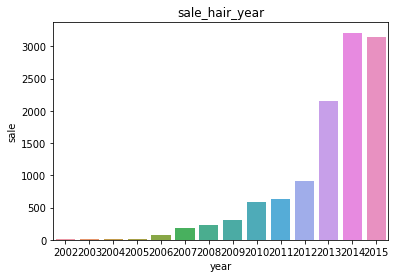

In [29]:
sale_hair_year = sales_hair.groupby('year')['sale'].sum()
sns.barplot(x = sale_hair_year.index, y =sale_hair_year)
plt.title('sale_hair_year')

Text(0.5, 1.0, 'sale_micro_year')

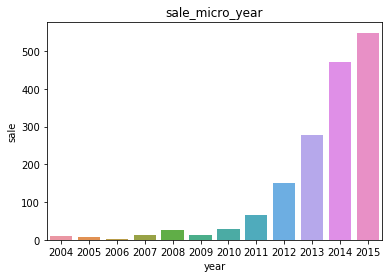

In [30]:
sale_micro_year = sales_micro.groupby('year')['sale'].sum()
sns.barplot(x = sale_micro_year.index, y =sale_micro_year)
plt.title('sale_micro_year')

Text(0.5, 1.0, 'sale_pacifier_year')

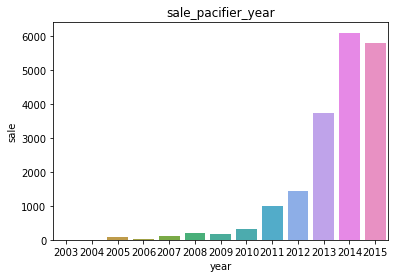

In [31]:
sale_pacifier_year = sales_pacifier.groupby('year')['sale'].sum()
sns.barplot(x = sale_pacifier_year.index, y =sale_pacifier_year)
plt.title('sale_pacifier_year')

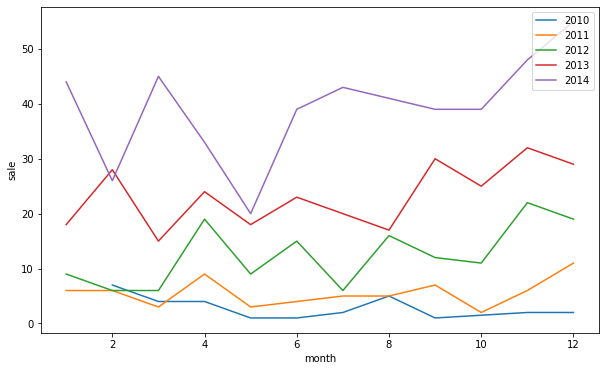

In [49]:
fig = plt.figure(figsize=(10,6))
for i in ['2010','2011','2012','2013','2014']:
    track = sales_micro.loc[sales_micro['year'] == i].groupby('month')['sale'].sum()
    track.index = track.index.astype('int64')
    track = track.sort_index()
    sns.lineplot(x = track.index, y= track, label = i)

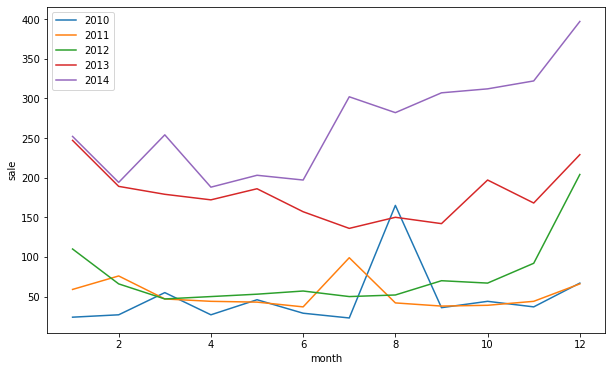

In [50]:
fig = plt.figure(figsize=(10,6))
for i in ['2010','2011','2012','2013','2014']:
    track = sales_hair.loc[sales_hair['year'] == i].groupby('month')['sale'].sum()
    track.index = track.index.astype('int64')
    track = track.sort_index()
    sns.lineplot(x = track.index, y= track, label = i)

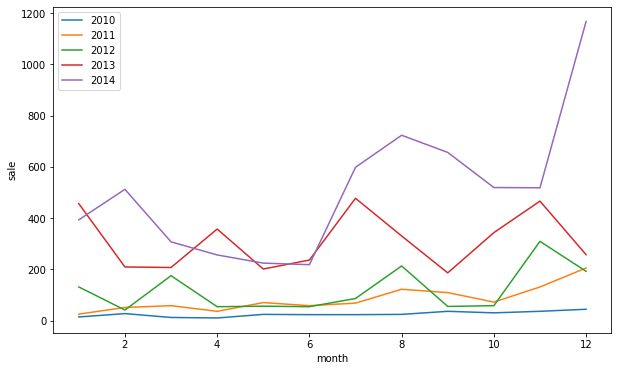

In [51]:
fig = plt.figure(figsize=(10,6))
for i in ['2010','2011','2012','2013','2014']:
    track = sales_pacifier.loc[sales_pacifier['year'] == i].groupby('month')['sale'].sum()
    track.index = track.index.astype('int64')
    track = track.sort_index()
    sns.lineplot(x = track.index, y= track, label = i)

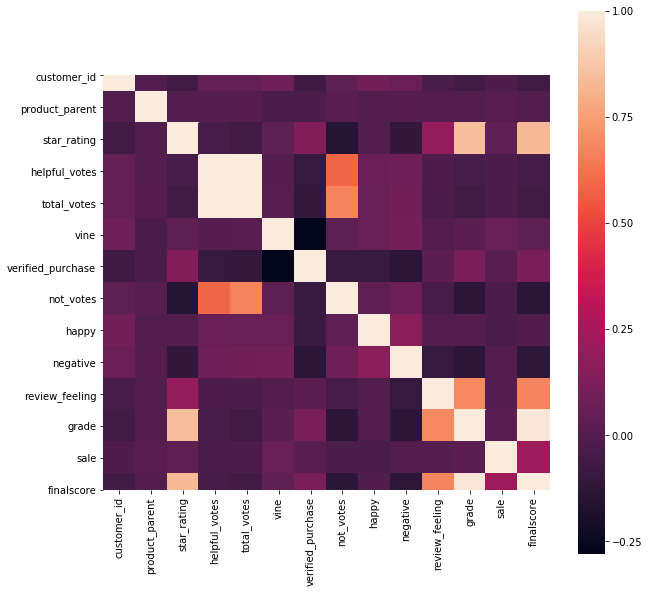

In [59]:
fig = plt.figure(figsize=(10,10))
sales_hair_corr = sales_hair.corr()
sns.heatmap(sales_hair_corr,square=True)

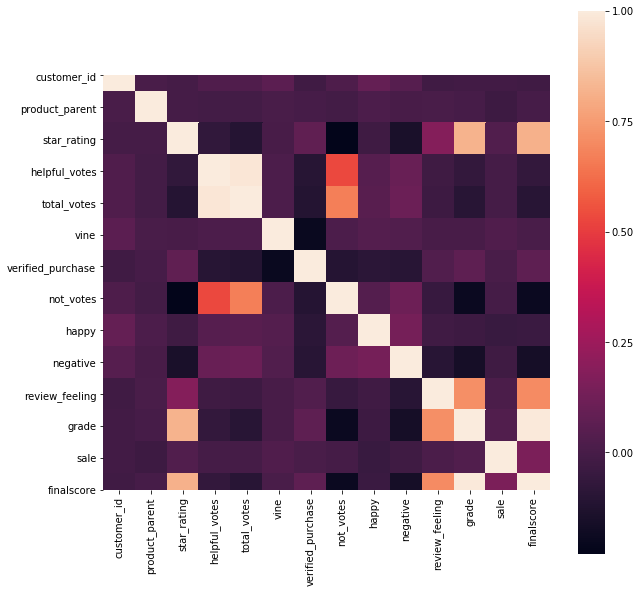

In [60]:
fig = plt.figure(figsize=(10,10))
sales_pacifier_corr = sales_pacifier.corr()
sns.heatmap(sales_pacifier_corr,square=True)

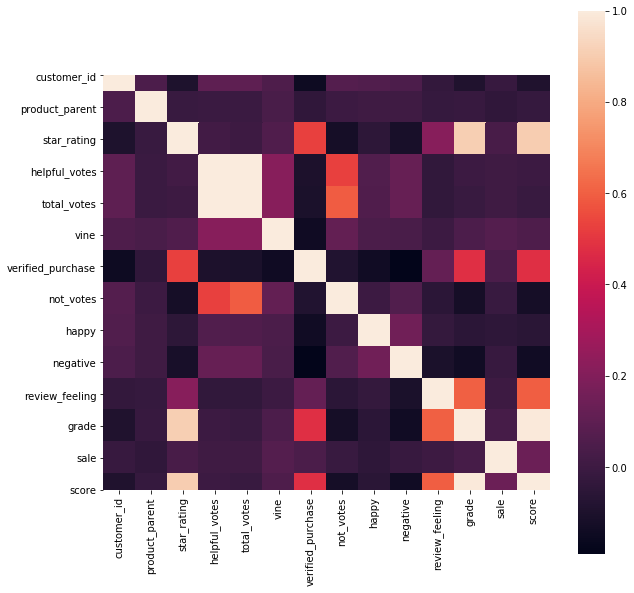

In [61]:
fig = plt.figure(figsize=(10,10))
sales_micro_corr = sales_micro.corr()
sns.heatmap(sales_micro_corr,square=True)

In [65]:
hair.groupby('vine')['grade'].mean()

vine
0    7.408910
1    7.692737
Name: grade, dtype: float64

In [ ]:
mapping_mark = {5:4.7484, 4:0.91728, 3:0.35532, 2:-0.93312, 1:-1.836}

In [76]:
hair['grade'] = 0
hair['star_score'] = hair['star_rating']
hair['star_score'] = hair['star_score'].map(mapping_mark)
hair['grade'] = hair['star_score'] * 0.3 + hair['review_feeling'] * 0.7


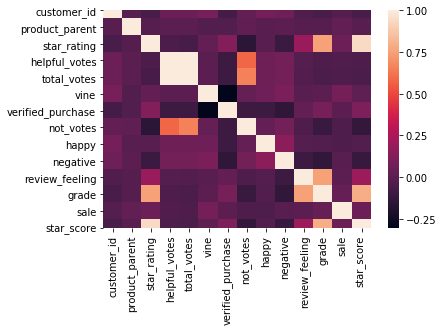

In [97]:
sns.heatmap(hair.corr())

In [79]:
mapping_mark = {5:4.7484, 4:0.91728, 3:0.35532, 2:-0.93312, 1:-1.836}

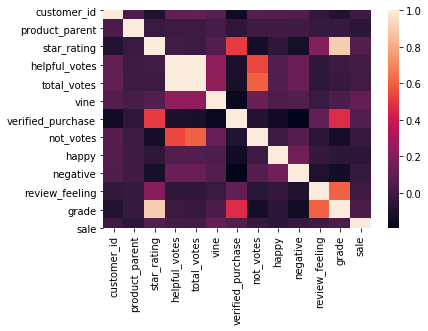

In [99]:
sns.heatmap(microwave.corr())

In [101]:
sales_hair['product_id'].value_counts(0)

B0009XH6TG    482
B003V264WW    461
B00132ZG3U    437
B00005O0MZ    367
B000R80ZTQ    274
             ... 
B0002Z1JK8      1
B000C233MI      1
B009ISDBHO      1
B00404WI70      1
B005GD1EP6      1
Name: product_id, Length: 538, dtype: int64

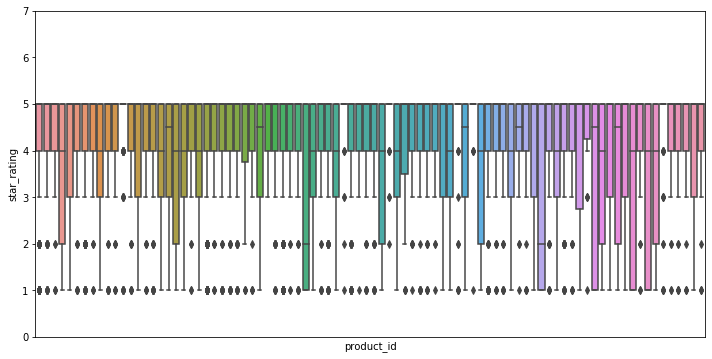

In [136]:
hair.groupby('product_id').size()
hair1 = hair.loc[hair['product_id'].isin(most_indexs)]
var = 'star_rating'
data = pd.concat([hair1['product_id'], hair1[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 6))
fig = sns.boxplot(x='product_id', y=var, data=data)
fig.axis(ymin=0, ymax=7)
plt.xticks([])
plt.show()

In [135]:
most_indexs = hair.groupby('product_id').size().sort_values().index[450:]

In [ ]:
sns.set()
cols = ['star_rating','review_feeling','review_len_score','helpful_votes']
sns.pairplot(hair[cols], size = 2.5)
plt.show()

In [ ]:
co = first3.corr()
ax = sns.heatmap(co, annot=True, square=True, annot_kws={'size': 6}, fmt='.2f')
ax.set_ylim([4,0])

In [ ]:
co = hair.corr()
ax = sns.heatmap(co, annot=True, square=True, annot_kws={'size': 6}, fmt='.2f')
ax.set_ylim([14,0])